In [1]:
import pandas as pd
import numpy as np
from time import time
from sklearn import preprocessing

# Содержание:
*
* [Устранить знак](#1-bullet)
* [Бинаризовать столбец](#2-bullet)
* [Расщепить столбец](#3-bullet)
* [Заменить пропуски средним](#4-bullet)

### Устранить знак: <a class="anchor" id="1-bullet"></a>

In [2]:
df = pd.DataFrame({'price': [str(i) + '$'  for i in np.random.choice(a = range(int(1e5)), size = int(1e7))]})

In [3]:
%%timeit
df['price_v1'] = df['price'].apply(lambda x: int(x[:-1]))

5.41 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [459]:
%%timeit
df['price_v2'] = df['price'].apply(lambda x: x[:-1]).astype(int)

3.46 s ± 56.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [460]:
%%timeit
df['price_v3'] = df['price'].apply(lambda x: x.replace('$', '')).astype(int)

4.22 s ± 58.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [461]:
%%timeit
df['price_v4'] = df['price'].str.replace('$', '').astype(int)

4.62 s ± 80.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [462]:
%%timeit
df['price_v5'] = df['price'].str[:-1].astype(int)

3.34 s ± 55.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [463]:
%%timeit
df['price_v6'] = np.array([x[:-1] for x in df['price'].values], dtype='int')

2.8 s ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [464]:
%%timeit
df['price_v7'] = df['price'].map(lambda x: x[:-1]).astype(int)

3.51 s ± 78.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [465]:
%%timeit
df['price_v8'] = df['price'].map(lambda x: x[:-1] if x[-1:]=='$' else x).astype(int)

4.15 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [466]:
%%timeit
df['price_v9'] = df['price'].apply(lambda x: x[:-1] if x[-1:]=='$' else x).astype(int)

4.08 s ± 64.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [467]:
df.head()

,price,price_v1,price_v2,price_v3,price_v4,price_v5,price_v6,price_v7,price_v8,price_v9
0,51942$,51942,51942,51942,51942,51942,51942,51942,51942,51942
1,21635$,21635,21635,21635,21635,21635,21635,21635,21635,21635
2,65446$,65446,65446,65446,65446,65446,65446,65446,65446,65446
3,98469$,98469,98469,98469,98469,98469,98469,98469,98469,98469
4,79363$,79363,79363,79363,79363,79363,79363,79363,79363,79363


### Бинаризовать столбец: <a class="anchor" id="2-bullet"></a>

In [2]:
def make_t(n_rows):
    tmp = pd.DataFrame({'type': np.where(np.random.rand(n_rows)<0.5, 'A', 'B'), 'feature': np.zeros(n_rows)})
    return tmp

data = make_t(100000)
data.head()

,type,feature
0,B,0.0
1,A,0.0
2,B,0.0
3,A,0.0
4,A,0.0


In [469]:
%%timeit
data['type_v1'] = data['type'].apply(lambda x: 1 if x == 'A' else 0)

34.4 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [470]:
%%timeit
data['type_v2'] = (data['type']=='A').astype(int)

6.5 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%%timeit
data['type_v3'] = np.where(data['type']=='A', 1, 0)

4.81 ms ± 43.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [472]:
%%timeit
data['type_v4'] = data['type'].map({'A' : 1, 'B' : '0'})

5.8 ms ± 270 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [473]:
%%timeit
data['type_v4_'] = data['type'].replace({'A' : 1, 'B' : '0'})

11.9 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [474]:
%%timeit
data['type_v5'] = data['type'].factorize()[0]

3.49 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [475]:
%%timeit
data['type_v6'] = pd.get_dummies(data['type'])['A']

4.4 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [476]:
%%timeit
data['type_v7'] = preprocessing.LabelEncoder().fit_transform(data['type'])

10.6 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [477]:
%%timeit
data['type_v8'] = data['type'].astype('category').cat.codes

3.98 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [478]:
%%timeit
data['type_v9'] = 0
data.loc[data['type']=='A', 'type_v9'] = 1

10.9 ms ± 331 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [479]:
%%timeit
data.loc[data['type']=='B', 'type_v10'] = 0
data.loc[data['type']=='A', 'type_v10'] = 1

17.8 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [480]:
%%timeit
data['type_v11'] = (data['type']=='A').astype(bool)
data['type_v11'] = data['type_v11'].astype(int)

6.85 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
data.head()

,type,feature,type_v3
0,B,0.0,0
1,A,0.0,1
2,B,0.0,0
3,A,0.0,1
4,A,0.0,1


### Расщепить столбец: <a class="anchor" id="3-bullet"></a>

In [482]:
def make_ab(n_rows):
    tmp = pd.DataFrame({'A': (100*np.random.rand(n_rows)).astype(int), 'B': (100*np.random.rand(n_rows)).astype(int), 'feature': np.zeros(n_rows)})
    tmp['A/B'] = tmp['A'].astype(str) + '/' + tmp['B'].astype(str)
    del tmp['A']
    del tmp['B']
    return tmp

data = make_ab(10000)
data.head()

,feature,A/B
0,0.0,10/53
1,0.0,5/16
2,0.0,36/6
3,0.0,27/99
4,0.0,33/78


In [483]:
%%timeit
tmp = data['A/B'].str.split('/')
data['A_v1'] = tmp.apply(lambda x: x[0])
data['B_v1'] = tmp.apply(lambda x: x[1])

8.35 ms ± 386 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [484]:
%%timeit
data[['A_v2', 'B_v2']] = pd.DataFrame(data['A/B'].str.split('/', 1).tolist())

5.33 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [485]:
%%timeit
data[['A_v3', 'B_v3']] = data['A/B'].str.split('/', expand=True)

14.8 ms ± 545 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [486]:
%%timeit
st='/'.join(data['A/B'])
data[['A_v4', 'B_v4']] = pd.DataFrame(np.array(st.split('/')).reshape(-1, 2))

4.88 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [487]:
data.head()

,feature,A/B,A_v1,B_v1,A_v2,B_v2,A_v3,B_v3,A_v4,B_v4
0,0.0,10/53,10,53,10,53,10,53,10,53
1,0.0,5/16,5,16,5,16,5,16,5,16
2,0.0,36/6,36,6,36,6,36,6,36,6
3,0.0,27/99,27,99,27,99,27,99,27,99
4,0.0,33/78,33,78,33,78,33,78,33,78


### Заменить пропуски средним: <a class="anchor" id="4-bullet"></a>

In [488]:
def make_t(n_rows):
    tmp = pd.DataFrame({'type': np.where(np.random.rand(n_rows)<0.5, 'train', 'test'),
                        'feature': np.where(np.random.rand(n_rows)<0.5, (100*np.random.rand(n_rows)).astype(int), np.nan)})
    tmp['feature_v1'] = tmp['feature']
    tmp['feature_v2'] = tmp['feature']
    tmp['feature_v3'] = tmp['feature']
    tmp['feature_v4'] = tmp['feature']
    return tmp

data = make_t(10000)
data.head()

,type,feature,feature_v1,feature_v2,feature_v3,feature_v4
0,train,NaN,NaN,NaN,NaN,NaN
1,train,42.0,42.0,42.0,42.0,42.0
2,train,31.0,31.0,31.0,31.0,31.0
3,test,NaN,NaN,NaN,NaN,NaN
4,test,51.0,51.0,51.0,51.0,51.0


In [489]:
%%timeit
name = 'feature_v1'
data.loc[data['type'] == 'test', name] = data[data['type'] == 'test'][name].fillna(data[data['type'] == 'test'][name].mean())
data.loc[data['type'] == 'train', name] = data[data['type'] == 'train'][name].fillna(data[data['type'] == 'train'][name].mean())

11.6 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [490]:
%%timeit
name = 'feature_v2'
data[name] = data.groupby('type')[name].transform(lambda x: x.fillna(x.mean()))

3.39 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [491]:
%%timeit
name = 'feature_v3'
data.loc[data[name].isna(), name] = data.groupby('type')[name].transform('mean')

3.31 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [492]:
%%timeit
name = 'feature_v4'
data[name] = np.where(data[name].isnull(), data['type'].map(data.groupby('type')[name].mean()), data[name])

1.95 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [493]:
data.head()

,type,feature,feature_v1,feature_v2,feature_v3,feature_v4
0,train,NaN,49.823529,49.823529,49.823529,49.823529
1,train,42.0,42.000000,42.000000,42.000000,42.000000
2,train,31.0,31.000000,31.000000,31.000000,31.000000
3,test,NaN,49.470541,49.470541,49.470541,49.470541
4,test,51.0,51.000000,51.000000,51.000000,51.000000


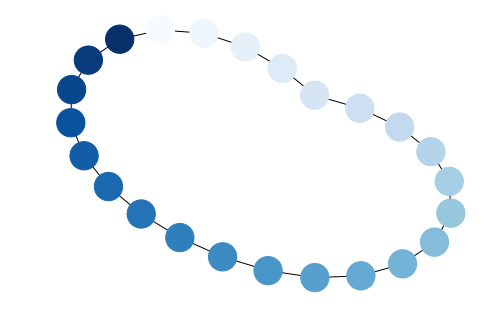

In [19]:
pos

{0: array([-0.03802956,  0.91225393]),
 1: array([-0.28737543,  0.95268938]),
 2: array([-0.53234059,  0.92183712]),
 3: array([-0.7495064 ,  0.81505577]),
 4: array([-0.90994647,  0.63755356]),
 5: array([-0.99255324,  0.41080151]),
 6: array([-0.99511591,  0.16487156]),
 7: array([-0.92495176, -0.07747997]),
 8: array([-0.79534904, -0.30090871]),
 9: array([-0.62693265, -0.50434698]),
 10: array([-0.42958056, -0.6825193 ]),
 11: array([-0.20938503, -0.82743414]),
 12: array([ 0.02986329, -0.92562926]),
 13: array([ 0.28122706, -0.96057977]),
 14: array([ 0.52673609, -0.92420927]),
 15: array([ 0.74368563, -0.81301206]),
 16: array([ 0.90634058, -0.63432474]),
 17: array([ 0.99241009, -0.40645389]),
 18: array([ 1.        , -0.15883385]),
 19: array([0.9345545 , 0.08529433]),
 20: array([0.8078736, 0.3105535]),
 21: array([0.63525793, 0.50973931]),
 22: array([0.43023033, 0.6794411 ]),
 23: array([0.20288752, 0.81564086])}